In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\Boston Housing\\outputBoston.csv",names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset['RM'][0]

6.575

In [7]:
for i in range(0,506):
    dataset['RM'][i]=round(dataset['RM'][i])

C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CRIM       106
ZN         106
INDUS      106
CHAS       106
NOX        106
RM         106
AGE        106
DIS        106
RAD        106
TAX        106
PTRATIO    106
B          106
LSTAT      106
MEDV       106
dtype: int64

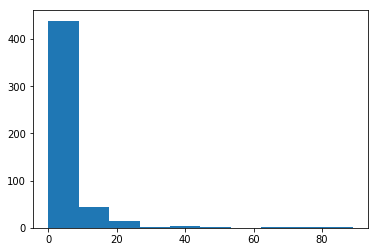

In [8]:
plt.hist(dataset['CRIM'],bins=10)
dataset[dataset['CRIM']>5.0].count()

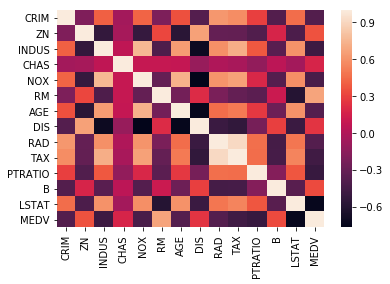

In [9]:
sns.heatmap(dataset.corr())

In [10]:
X=dataset.iloc[:,0:dataset.shape[1]-1]
Y=dataset.iloc[:,dataset.shape[1]-1]
print(X.shape)
print(Y.shape)
print(X.head())
print(Y.head())

(506, 13)
(506,)
      CRIM    ZN  INDUS  CHAS    NOX   RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  7.0  65.2  4.0900    1  296.0     15.3   
1  0.02731   0.0   7.07     0  0.469  6.0  78.9  4.9671    2  242.0     17.8   
2  0.02729   0.0   7.07     0  0.469  7.0  61.1  4.9671    2  242.0     17.8   
3  0.03237   0.0   2.18     0  0.458  7.0  45.8  6.0622    3  222.0     18.7   
4  0.06905   0.0   2.18     0  0.458  7.0  54.2  6.0622    3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
y_test.shape

(102,)

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred=regressor.predict(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(n_estimators=300,random_state=0)
regressor1.fit(X_train,y_train)

#Predicting a new result
y_pred = regressor1.predict(X_test)

In [20]:
y=[]
for i in range(0,102):
    y.append(i);

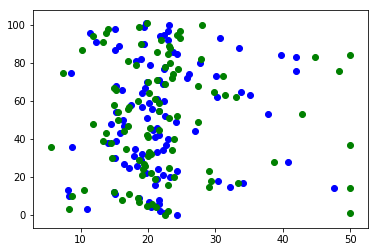

In [21]:
plt.scatter(y_pred,y,color='Blue')
plt.scatter(y_test,y,color='Green')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
meanSquaredError=mean_squared_error(y_test, y_pred)
sqrt(meanSquaredError)

5.20807311255819

In [23]:
for i in range(0,10):
    print(y_test[i:i+1])
    print(y_pred[i])
    print(y_pred[i]-y_test[i:i+1],"\n")

329    22.6
Name: MEDV, dtype: float64
24.286666666666672
329    1.686667
Name: MEDV, dtype: float64 

371    50.0
Name: MEDV, dtype: float64
22.471000000000032
371   -27.529
Name: MEDV, dtype: float64 

219    23.0
Name: MEDV, dtype: float64
21.736333333333345
219   -1.263667
Name: MEDV, dtype: float64 

403    8.3
Name: MEDV, dtype: float64
11.01433333333332
403    2.714333
Name: MEDV, dtype: float64 

78    21.2
Name: MEDV, dtype: float64
20.403666666666687
78   -0.796333
Name: MEDV, dtype: float64 

15    19.9
Name: MEDV, dtype: float64
20.621333333333293
15    0.721333
Name: MEDV, dtype: float64 

487    20.6
Name: MEDV, dtype: float64
21.592666666666624
487    0.992667
Name: MEDV, dtype: float64 

340    18.7
Name: MEDV, dtype: float64
20.11033333333335
340    1.410333
Name: MEDV, dtype: float64 

310    16.1
Name: MEDV, dtype: float64
21.65666666666667
310    5.556667
Name: MEDV, dtype: float64 

102    18.6
Name: MEDV, dtype: float64
18.675666666666693
102    0.075667
Name: MED